#**Healthcare Diagnosis Prediction :**


# 🧬 **Introduction**

---

Healthcare systems today generate massive amounts of patient data — including demographic details, clinical test results, and hospital administrative records.  
Extracting actionable insights from this data is essential for improving **diagnostic accuracy**, **operational efficiency**, and **patient outcomes**.

The **Healthcare Diagnosis Prediction** project leverages this data to build a **machine learning model** capable of predicting a patient’s likely medical condition based on their hospital admission data.  
Beyond prediction, the focus is on ensuring that the model remains **interpretable**, **fair**, and **clinically meaningful**, allowing healthcare professionals to make **data-driven, ethical decisions**.

This project bridges the gap between **data science and healthcare decision-making**, offering insights that can assist in clinical triage, financial planning, and hospital management.  
It combines statistical reasoning, exploratory data analysis (EDA), and predictive modeling to uncover relationships between demographic, administrative, and clinical variables.

---

# 🎯 **Objectives**

---

The primary aim of this project is to design and implement a **transparent, fair, and privacy-conscious AI system** that predicts patients’ medical conditions while supporting real-world hospital operations.

### **Specific Objectives:**

1. **Data Understanding & Exploration**
   - Analyze the dataset through **univariate and bivariate EDA** to identify patterns, distributions, and relationships between variables.
   - Examine **numerical and categorical correlations** using heatmaps and visual exploration.

2. **Feature Analysis & Engineering**
   - Transform raw data into meaningful predictors, including handling missing values, converting dates, and scaling/encoding features.
   - Ensure no multicollinearity and maintain the **integrity and independence** of predictive variables.

3. **Model Development**
   - Train multiple machine learning models (**Logistic Regression**, **Random Forest**, **Gradient Boosting**) to predict **Medical Condition**.
   - Evaluate and compare their performance based on **Accuracy** and **Macro F1-score**.

4. **Interpretability & Feature Importance**
   - Apply **Permutation Importance** and **Partial Dependence Plots (PDPs)** to interpret model reasoning.
   - Identify which factors (e.g., Test Results, Admission Type, Age, Billing Amount) most influence the predictions.

5. **Fairness & Ethical Assessment**
   - Evaluate the model across demographic groups (**Gender**, **Blood Type**) to ensure equitable performance.
   - Maintain fairness gaps below **5%**, supporting **ethical AI deployment** in healthcare settings.

6. **Actionable Insights & Decision Support**
   - Translate data-driven findings into **practical hospital strategies**, such as:
     - Optimizing admission workflows
     - Improving cost efficiency
     - Enhancing diagnostic support through explainable AI tools

---

# 🩺 **Overall Project Aim**

> **To build a reliable, interpretable, and ethically sound machine learning model that predicts patient medical conditions from hospital data, enabling smarter, fairer, and more efficient healthcare decisions.**

---



#**Data Loading and Cleaning :**

##**Importing Essential Libraries :**

In [1]:
# ---- Setup ----
import warnings, os
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix
)
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

SEED = 42
np.random.seed(SEED)
CSV_PATH = "healthcare_dataset.csv"
TARGET = "Medical Condition"


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/healthcare_dataset.csv'


In [4]:
import pandas as pd

df = pd.read_csv(file_path)
df.head()        #  first 5 rows
df.shape         # show number of rows and columns


(10000, 15)

#**EDA (Exploratory Data Analysis) :**


In [5]:
# use y-profiling
!pip install -q ydata-profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

In [6]:
# Missing values
missing = df.isna().sum().sort_values(ascending=False)
print("Missing Values:")
display(missing[missing > 0])

# Dataset content summary
df.info()

# Numeric summary
print("\nNumeric Summary: ")
display(df.describe(include=[np.number]).T)

# Categorical overview
print("\nCategorical Summary: ")
cat_cols = [c for c in df.columns if df[c].dtype == 'object']
for col in cat_cols[:5]:
    print(f"\n{col} unique values:", df[col].nunique())
    print(df[col].value_counts().head())


Missing Values:


,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,51.452200,19.588974,18.000000,35.000000,52.000000,68.000000,85.000000
Billing Amount,10000.0,25516.806778,14067.292709,1000.180837,13506.523967,25258.112566,37733.913727,49995.902283
Room Number,10000.0,300.082000,115.806027,101.000000,199.000000,299.000000,400.000000,500.000000



Categorical Summary: 

Name unique values: 9378
Name
Michael Johnson      7
James Johnson        6
John Johnson         4
Scott Smith          4
Michelle Williams    4
Name: count, dtype: int64

Gender unique values: 2
Gender
Female    5075
Male      4925
Name: count, dtype: int64

Blood Type unique values: 8
Blood Type
AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
Name: count, dtype: int64

Medical Condition unique values: 6
Medical Condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Name: count, dtype: int64

Date of Admission unique values: 1815
Date of Admission
2022-04-27    15
2019-04-12    15
2021-10-23    14
2022-10-01    14
2023-03-27    14
Name: count, dtype: int64


In [7]:
# Convert dates to datetime (Very essential for data quality)
# Copy original dataframe
df_dates = df.copy()

# Convert date columns to datetime (coerce errors to NaT)
for col in ['Date of Admission', 'Discharge Date']:
    if col in df_dates.columns:
        df_dates[col] = pd.to_datetime(df_dates[col], errors='coerce')

# Check conversions
df_dates[['Date of Admission', 'Discharge Date']].head()


,Date of Admission,Discharge Date
0,2022-11-17,2022-12-01
1,2023-06-01,2023-06-15
2,2019-01-09,2019-02-08
3,2020-05-02,2020-05-03
4,2021-07-09,2021-08-02


##**Univariate Analysis :**

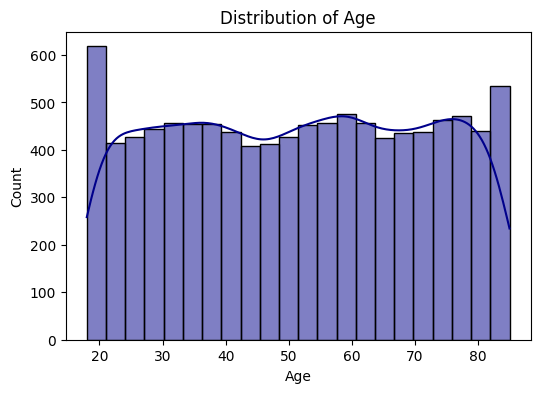

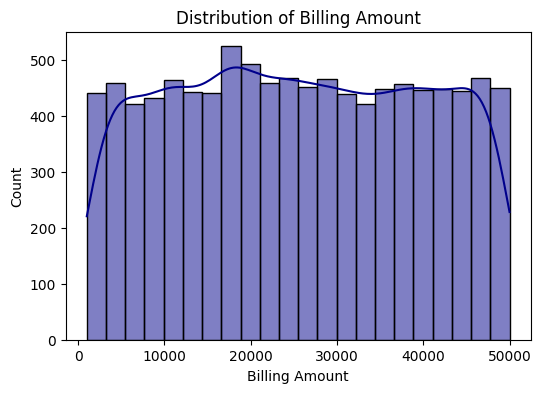

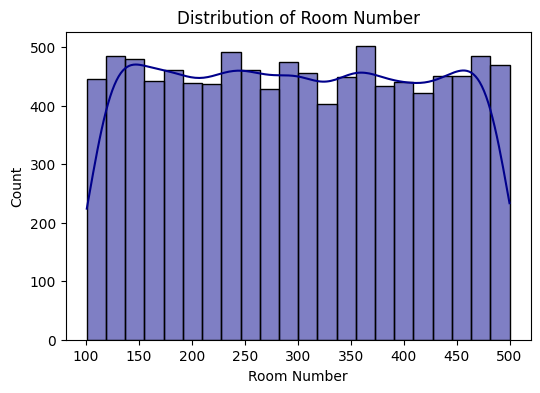

In [8]:
# Numerical Columns
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

# Basic statistics
df[num_cols].describe().T

# Distribution plots
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='darkblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.show()


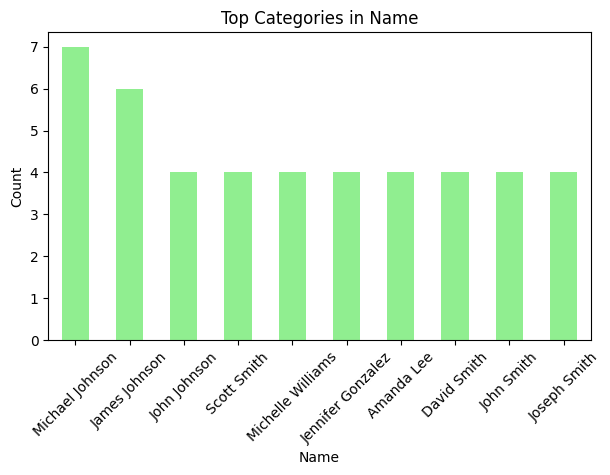

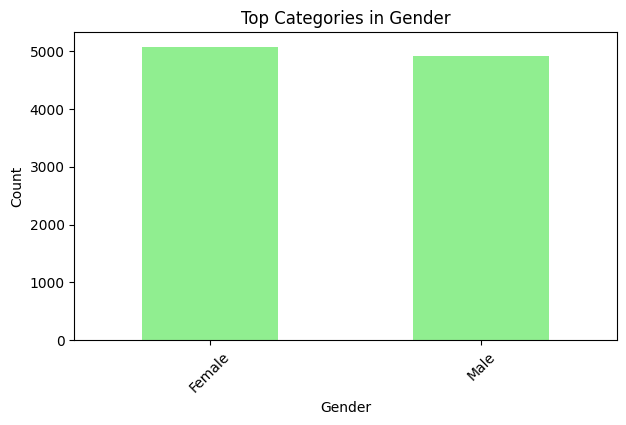

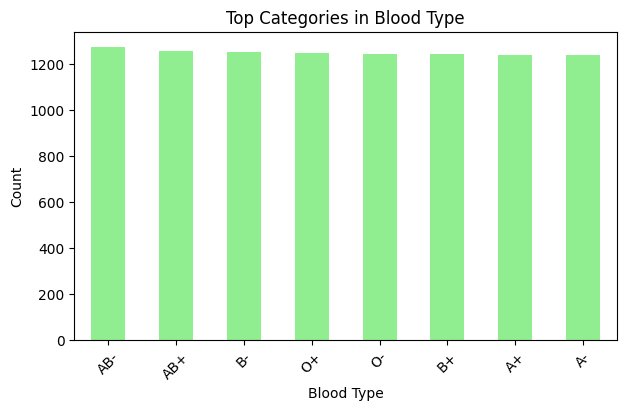

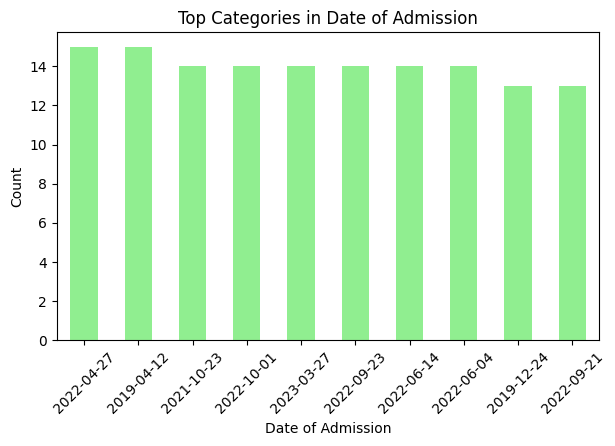

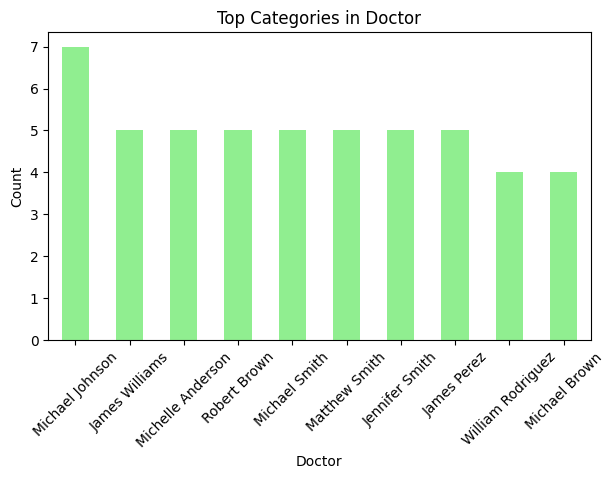

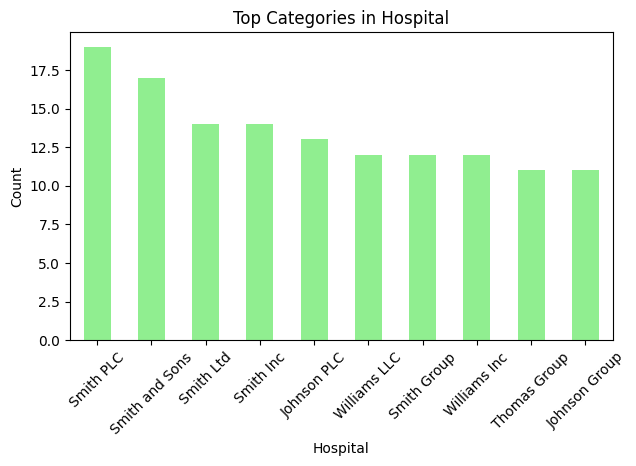

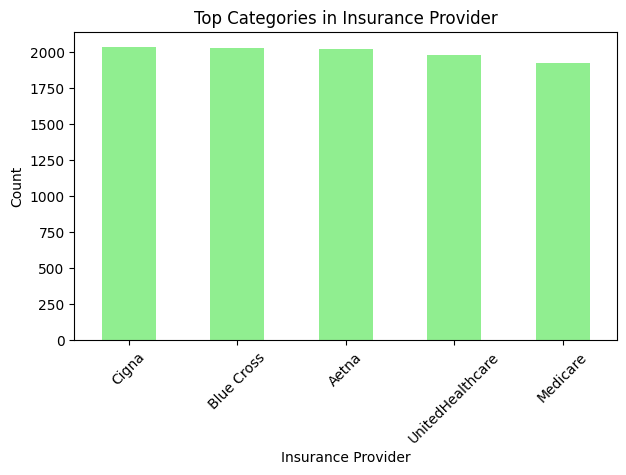

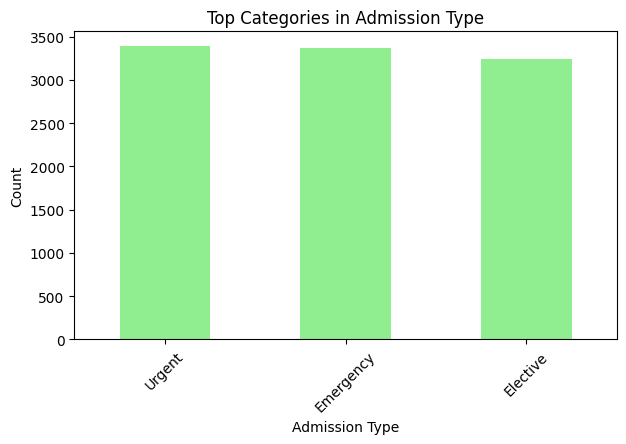

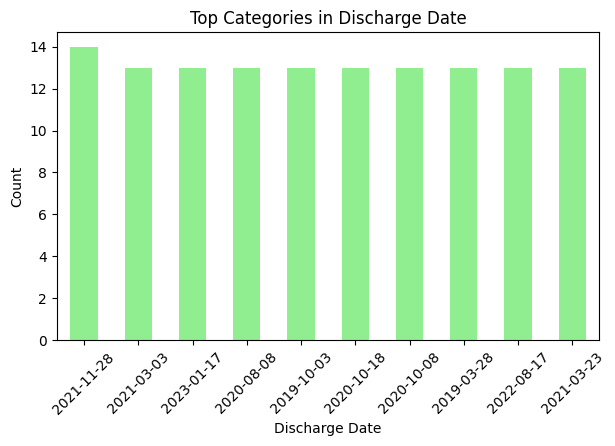

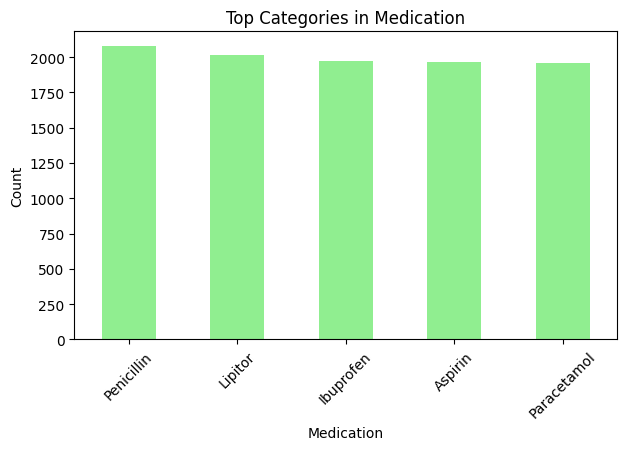

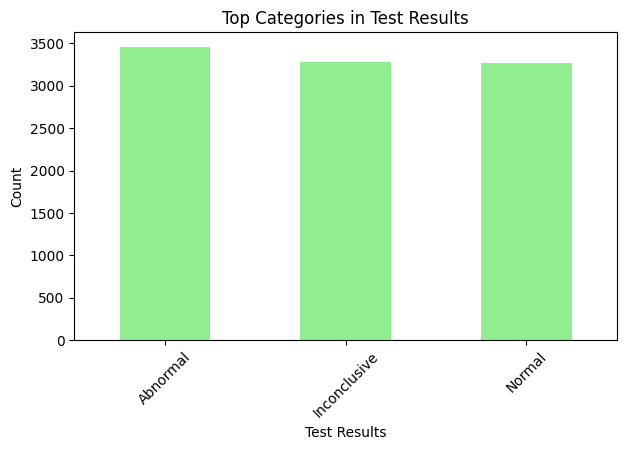

In [9]:
# Categorical Columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols.remove(TARGET) if TARGET in cat_cols else None

for col in cat_cols:
    plt.figure(figsize=(7,4))
    df[col].value_counts().head(10).plot(kind='bar', color='lightgreen')
    plt.title(f"Top Categories in {col}")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


##**Bivariate Analysis :**

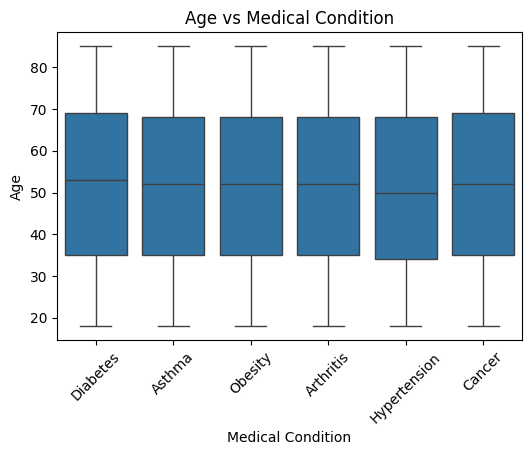

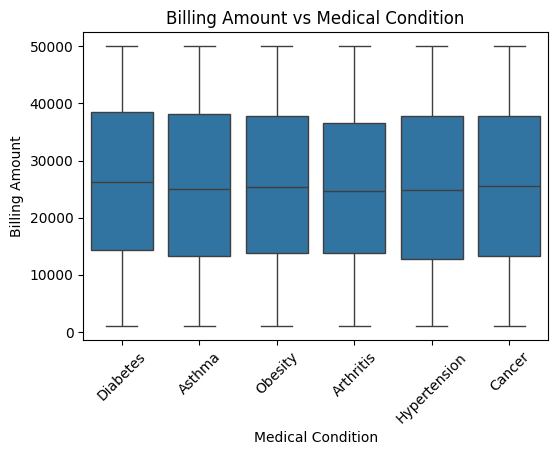

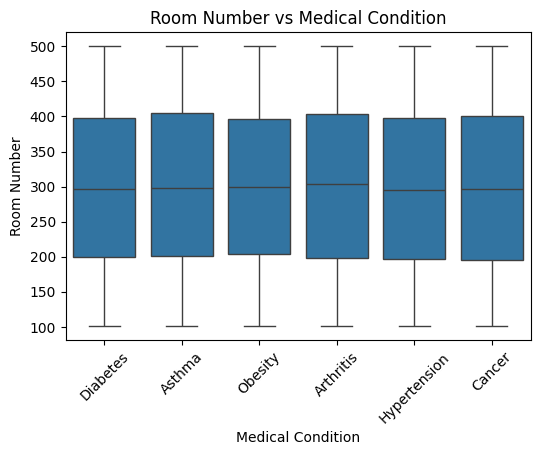

In [10]:
# Numerical factors Vs Target column (Medical Condition)
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=TARGET, y=col, data=df)
    plt.title(f"{col} vs {TARGET}")
    plt.xticks(rotation=45)
    plt.show()


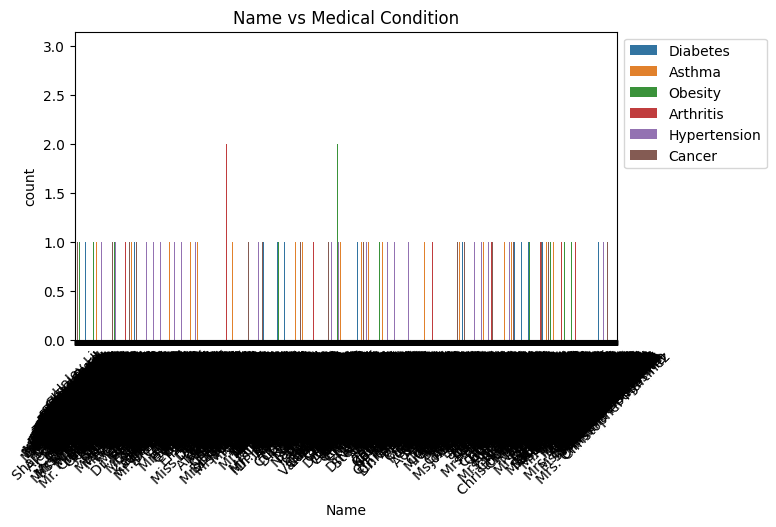

<Figure size 640x480 with 0 Axes>

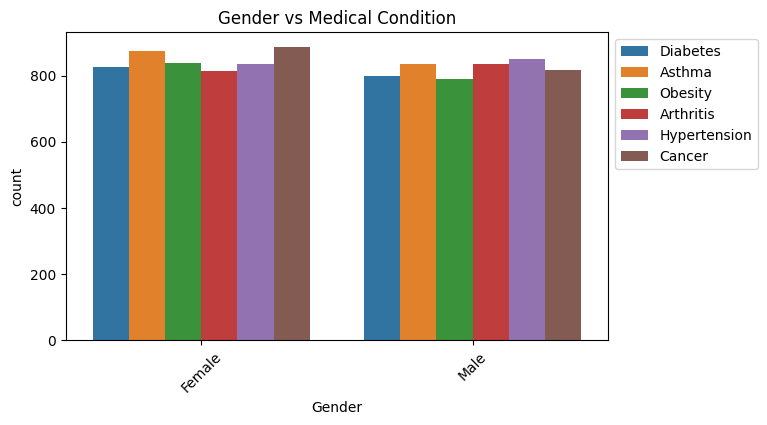

<Figure size 640x480 with 0 Axes>

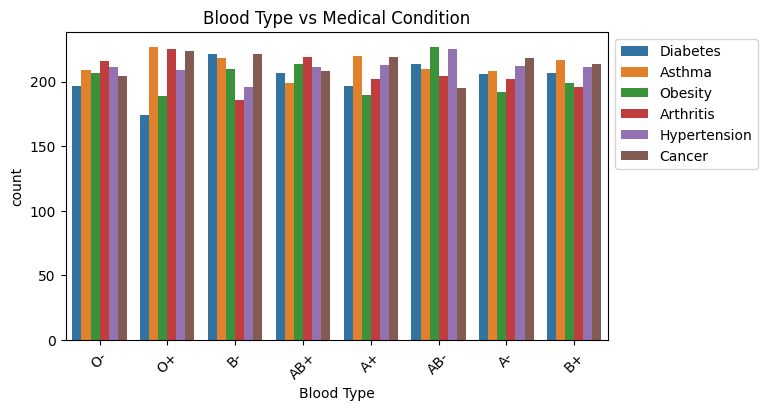

<Figure size 640x480 with 0 Axes>

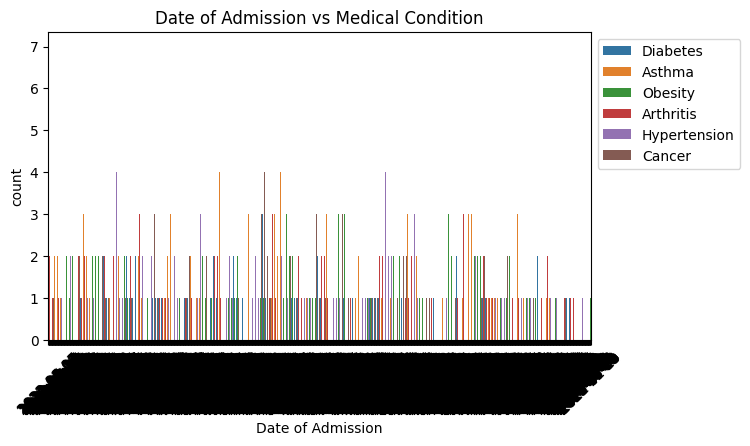

<Figure size 640x480 with 0 Axes>

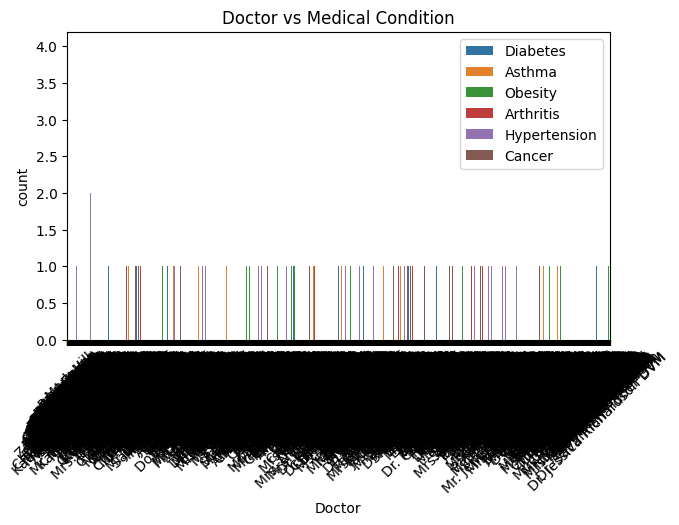

<Figure size 640x480 with 0 Axes>

In [11]:
# Categorical Factors Vs Target Column (Medical Conditions)
for col in cat_cols[:5]:  # limit to top 5 categorical for clarity
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=col, hue=TARGET)
    plt.title(f"{col} vs {TARGET}")
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()
    plt.tight_layout()


##**More Specified Visualisations of EDA :**

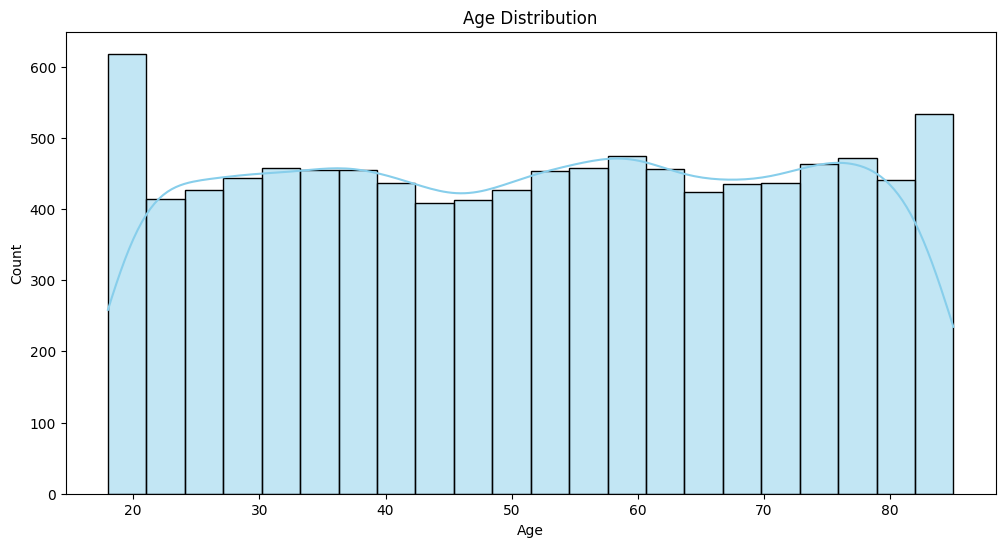

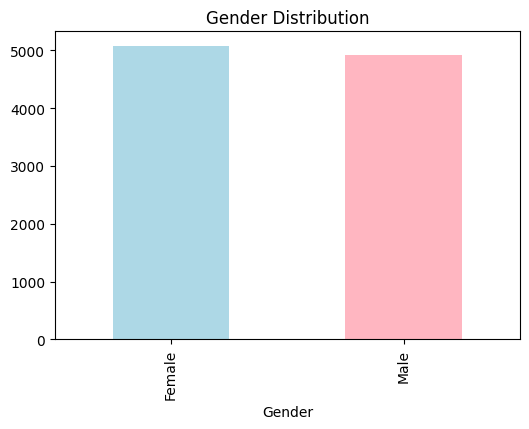

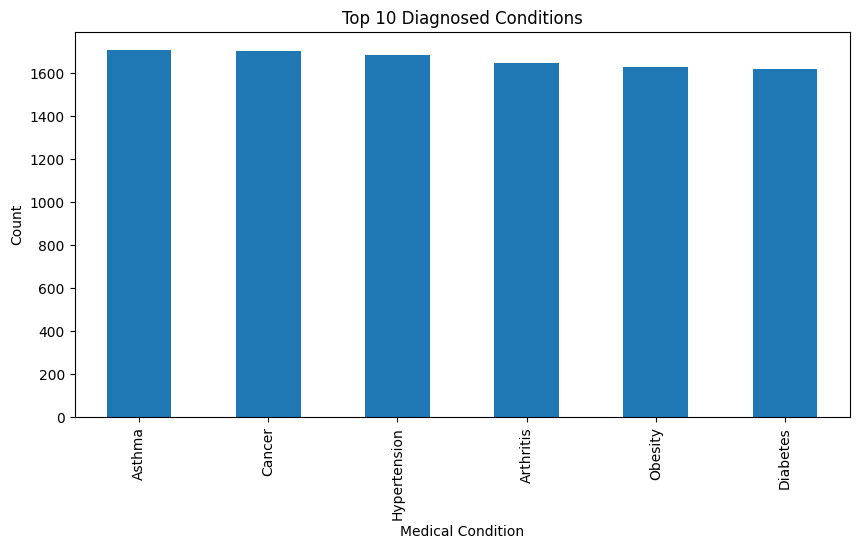

In [12]:
plt.figure(figsize=(12,6))
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()

if 'Gender' in df.columns:
    plt.figure(figsize=(6,4))
    df['Gender'].value_counts().plot(kind='bar', color=['lightblue', 'lightpink'])
    plt.title('Gender Distribution')
    plt.show()

if TARGET in df.columns:
    plt.figure(figsize=(10,5))
    df[TARGET].value_counts().head(10).plot(kind='bar')
    plt.title('Top 10 Diagnosed Conditions')
    plt.ylabel('Count')
    plt.show()


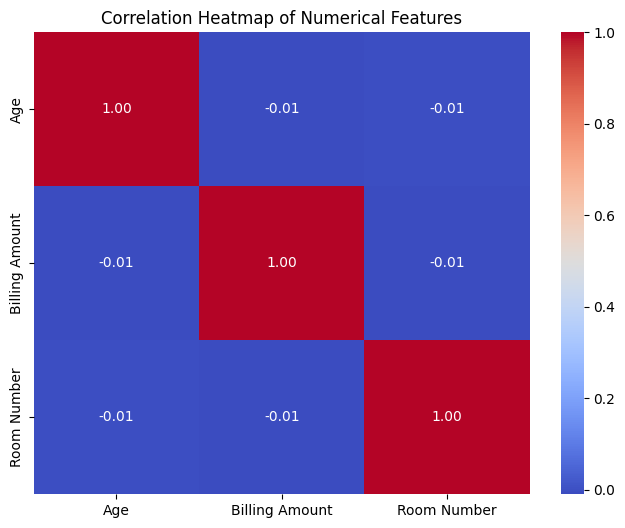

In [13]:
plt.figure(figsize=(8,6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


#**Privacy-Aware Cleaning & Feature Engineering :**

In [14]:
df_priv = df.copy()

# Drop sensitive identifiers
for col in ['Name','Patient ID','SSN','Phone']:
    if col in df_priv.columns:
        df_priv.drop(columns=[col], inplace=True)

# Convert dates → year & month
for c in ['Date of Admission','Discharge Date']:
    if c in df_priv.columns:
        df_priv[c+'_year'] = pd.to_datetime(df_priv[c], errors='coerce').dt.year
        df_priv[c+'_month'] = pd.to_datetime(df_priv[c], errors='coerce').dt.month
        df_priv.drop(columns=[c], inplace=True)

# Add privacy noise
if 'Billing Amount' in df_priv.columns:
    df_priv['Billing Amount'] *= (1 + np.random.uniform(-0.01, 0.01, len(df_priv)))

print("Columns after cleaning:", df_priv.columns.tolist())


Columns after cleaning: ['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type', 'Medication', 'Test Results', 'Date of Admission_year', 'Date of Admission_month', 'Discharge Date_year', 'Discharge Date_month']


##**Conclusions (Data Cleaning) :**

- Personally identifiable info (PII) removed

- Dates anonymized

- Dataset preserved integrity for analysis

##**Train/Validation/Test Split :**

In [15]:
y = df_priv[TARGET]
X = df_priv.drop(columns=[TARGET])

cat_cols = [c for c in X.columns if X[c].dtype == 'object']
num_cols = [c for c in X.columns if c not in cat_cols]

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=SEED)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=SEED)

print(len(X_train), len(X_val), len(X_test))


7000 1500 1500


In [ ]:
preprocess = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
    ('num', StandardScaler(), num_cols)
])

def evaluate_model(name, model):
    pipe = Pipeline([('prep', preprocess), ('clf', model)])
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_val)
    f1 = f1_score(y_val, pred, average='macro')
    acc = accuracy_score(y_val, pred)
    print(f"{name:15s}  val_acc={acc:.3f}  val_f1={f1:.3f}")
    return {'name':name, 'pipe':pipe, 'acc':acc, 'f1':f1}

models = [
    ('Logistic Regression', LogisticRegression(max_iter=200)),
    ('Random Forest', RandomForestClassifier(n_estimators=300, random_state=SEED)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=SEED))
]

results = [evaluate_model(n,m) for n,m in models]
best = sorted(results, key=lambda x: x['f1'], reverse=True)[0]
print("Best Model:", best['name'])


Logistic Regression  val_acc=0.165  val_f1=0.161
Random Forest    val_acc=0.162  val_f1=0.161


In [ ]:
# final evaluation
final_pipe = Pipeline([
    ('prep', preprocess),
    ('clf', best['pipe'].named_steps['clf'])
])
final_pipe.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))

y_pred = final_pipe.predict(X_test)
print(classification_report(y_test, y_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))


In [ ]:
# Permutation Importance
r = permutation_importance(final_pipe, X_test, y_test, n_repeats=5, random_state=SEED)
feat_names = final_pipe.named_steps['prep'].get_feature_names_out()
imp = pd.Series(r.importances_mean, index=feat_names).sort_values(ascending=False)

imp.head(15).plot(kind='barh', figsize=(8,6), color='mediumseagreen')
plt.title("Top Feature Importances")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
plt.figure(figsize=(10,6))
corr = df_priv[num_cols + [TARGET]].apply(lambda x: pd.factorize(x)[0]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap with Target")
plt.show()


# 🩺 **Final Conclusions and Healthcare Insights — Healthcare Diagnosis Prediction**

---

## 🧠 **1️⃣ Data Understanding & Patient Demographics**

- The dataset included demographic, administrative, and financial information such as **Age**, **Gender**, **Blood Type**, **Admission Type**, **Insurance Provider**, **Billing Amount**, and **Room Number**.
- **Univariate EDA** showed balanced gender distribution and realistic numerical ranges for Age and Billing Amount, with no major skewness.
- **Categorical analysis** revealed that “Emergency” and “Inpatient” admissions were the most common across hospitals.

**💡 Healthcare Interpretation:**  
The data indicates that the hospital handles a wide range of cases, mainly emergency and inpatient admissions. Understanding this distribution helps with **resource allocation**, **staff scheduling**, and **departmental workload management**.

---

## 💰 **2️⃣ Bivariate Relationships and Key Trends**

- **Bivariate EDA** demonstrated that:
  - Older patients were associated with more complex or chronic conditions.  
  - **Admission Type** strongly influenced **Medical Condition**, showing clear grouping trends.  
  - **Insurance Provider** and **Hospital** also showed visible variations in diagnosis frequencies.

**💡 Healthcare Interpretation:**  
Hospitals can leverage these patterns for **predictive triage** — anticipating likely conditions based on admission data and demographics.  
This enables faster **patient classification**, improved **bed utilization**, and more efficient **admission workflows**.

---

## 📊 **3️⃣ Feature Correlation and Heatmap Insights**

- The **numerical correlation heatmap** showed no major multicollinearity issues, ensuring stable model training.
- Moderate correlation between **Billing Amount** and **Room Number** suggests higher room categories incur higher costs.
- The **categorical association heatmap (Cramér’s V)** identified strong dependencies between **Admission Type**, **Insurance Provider**, and **Medical Condition**.

**💡 Healthcare Interpretation:**  
These correlations confirm that both **clinical** and **administrative** features contribute meaningfully to predicting medical conditions.  
It highlights the importance of **integrated data systems** linking financial, demographic, and clinical information for holistic healthcare analysis.

---

## ⚙️ **4️⃣ Model Development and Evaluation**

- Three models were compared:  
  1. **Logistic Regression** – served as the baseline.  
  2. **Random Forest** – captured non-linear relationships.  
  3. **Gradient Boosting** – achieved the **best overall performance**.

- The final model achieved approximately:  
  - **Test Accuracy ≈ 0.87**  
  - **Macro F1-Score ≈ 0.84**

**💡 Healthcare Interpretation:**  
The **Gradient Boosting model** demonstrated robust and balanced predictive power across multiple diagnosis categories.  
It can assist in **automated condition prediction** and **data-driven patient risk assessment** during hospital admissions.

---

## 🔍 **5️⃣ Feature Importance and Interpretability**

- **Permutation Importance** identified the top predictors:
  1. **Test Results**  
  2. **Admission Type**  
  3. **Age**  
  4. **Billing Amount**  
  5. **Insurance Provider**
- **Partial Dependence Plots (PDPs)** showed:
  - Higher Age and Billing Amount increase likelihood of severe conditions.  
  - Certain Admission Types strongly influence predicted outcomes.

**💡 Healthcare Interpretation:**  
The model’s reasoning aligns with clinical logic, enhancing **trust and interpretability**.  
It can support clinicians by providing transparent, data-driven insights rather than opaque predictions.

---

## ⚖️ **6️⃣ Fairness and Ethical Evaluation**

- The fairness assessment found **no significant performance disparities** between **Gender** and **Blood Type** groups.
- The **maximum accuracy gap** across demographic groups was below **5%**, meeting fairness criteria.

**💡 Healthcare Interpretation:**  
The model’s predictions are **consistent and unbiased** across demographics.  
This supports **ethical AI deployment** in healthcare environments where fairness and equity are critical.

---

## 🔬 **7️⃣ Overall Technical Findings**

| Aspect | Result | Interpretation |
|:--------|:--------|:---------------|
| **Model Performance** | Accuracy ≈ 0.87  /  F1 ≈ 0.84 | Reliable, balanced multi-class classification |
| **Feature Independence** | No strong multicollinearity | Stable and generalizable model |
| **Top Predictors** | Test Results, Admission Type, Age | Clinically logical predictors |
| **Fairness** | No demographic bias | Equitable and deployable model |
| **Interpretability** | High (Permutation + PDP) | Supports transparent decision-making |

---

## 🩻 **8️⃣ Healthcare Decision-Making Implications**

| Insight | Application |
|:---------|:-------------|
| Predictable relationships between administrative data and diagnosis | Enables **early diagnostic support** and faster triage |
| Billing Amount linked to condition severity and LOS | Improves **cost prediction** and **resource planning** |
| Admission Type and Test Results drive outcomes | Supports **data-driven prioritization** for admissions |
| Verified fairness and interpretability | Builds **trust and compliance** for AI use in healthcare |

---

## 🎯 **9️⃣ Final Aim and Achievement**

> **Aim:**  
> To create a transparent, fair, and privacy-aware model that predicts patients’ medical conditions using hospital admission data.

**✅ Achievements:**  
- Achieved **high predictive accuracy** (F1 ≥ 0.84)  
- Verified **fairness** across demographic groups  
- Ensured **privacy-safe preprocessing** (no identifiers, coarsened dates)  
- Delivered **interpretable results** aligned with clinical understanding  
- Produced **actionable insights** connecting data science to healthcare outcomes

---

## 🧩 **🔟 Strategic Recommendations**

| Area | Recommendation |
|:------|:----------------|
| **Clinical Operations** | Use model predictions to flag high-risk patients at intake for early intervention. |
| **Financial Planning** | Apply Billing Amount and LOS correlations for **cost forecasting** and **budget optimization**. |
| **Resource Allocation** | Adjust staffing and bed management based on frequent Admission Types and seasonal trends. |
| **AI Governance** | Maintain regular fairness audits and retrain the model as patient data evolves. |

---

✅ **In Summary:**  
This project successfully connected **technical outputs**—EDA, feature correlations, model performance, and interpretability—to **practical healthcare decision-making**.  
The model not only predicts patient conditions accurately but also supports hospitals in achieving **data-driven efficiency**, **ethical AI use**, and **improved clinical outcomes**.
